## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [1]:
% matplotlib inline
% pprint off


# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

In [5]:
def resize(image, size, method='bilinear'):
    return misc.imresize(image, size, interp=method)
    

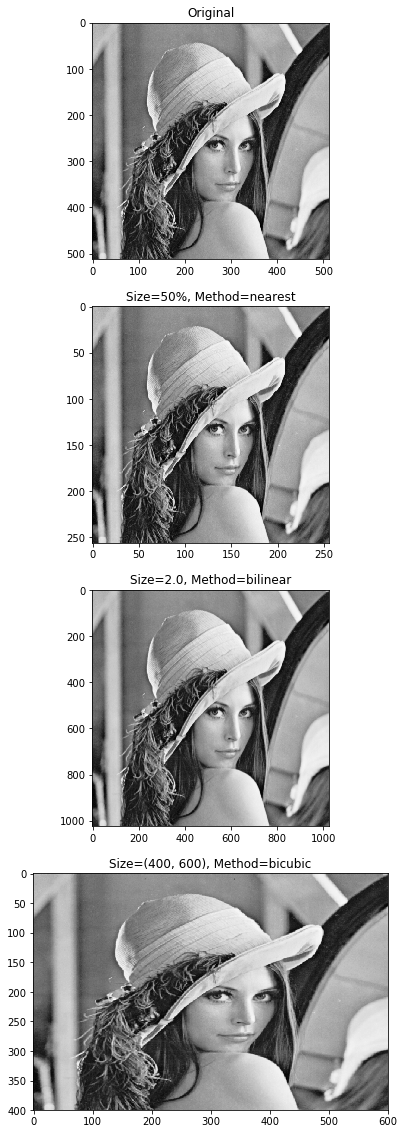

In [48]:
lena = io.imread('./images/lena-grey.bmp')

methods = ['nearest', 'bilinear', 'bicubic']
sizes = [50, 2., (400,600)]

plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
plt.imshow(lena, cmap=cm.Greys_r)
plt.title("Original")

plt.subplot(4,1,2)
plt.imshow(resize(lena, size=sizes[0], method=methods[0]), cmap=cm.Greys_r)
plt.title("Size={}%, Method={}".format(sizes[0], methods[0]))

plt.subplot(4,1,3)
plt.imshow(resize(lena, size=sizes[1], method=methods[1]), cmap=cm.Greys_r)
plt.title("Size={}, Method={}".format(sizes[1], methods[1]))

plt.subplot(4,1,4)
plt.imshow(resize(lena, size=sizes[2], method=methods[2]), cmap=cm.Greys_r)
plt.title("Size={}, Method={}".format(sizes[2], methods[2]))


**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


In [117]:
def simple_blend(image1, image2):
    im1 = np.copy(image1)
    im2 = np.copy(image2)
    width = im1.shape[1]
    for i in im1:
        i[width/2:] = 0.
    for i in im2:
        i[:width/2] = 0.
    return im1 + im2

def alpha_blend(image1, image2, alpha, margin):
    im1 = np.copy(image1)
    im2 = np.copy(image2)
    width = im1.shape[1]
    center = np.floor(width/2)
    x1 = center - margin
    x2 = center + margin
    x = np.arange(x1,x2+1)
    y = np.arange(float(x2-x1+1))/(x2-x1)
    
    for i in im1:
        i[]
    new_im1 = 
    return im1 * alpha + im2 * (1-alpha)

In [137]:
orange = io.imread('./images/orange.jpeg', as_grey=1)
apple = io.imread('./images/apple.jpeg', as_grey=1)

x1 = 8
x2 = 12
x = np.arange(x1,x2+1)
y = np.arange(float(x2-x1+1))/(x2-x1)
print(x)
print(y)

[ 8  9 10 11 12]
[ 0.    0.25  0.5   0.75  1.  ]


TypeError: Image data can not convert to float

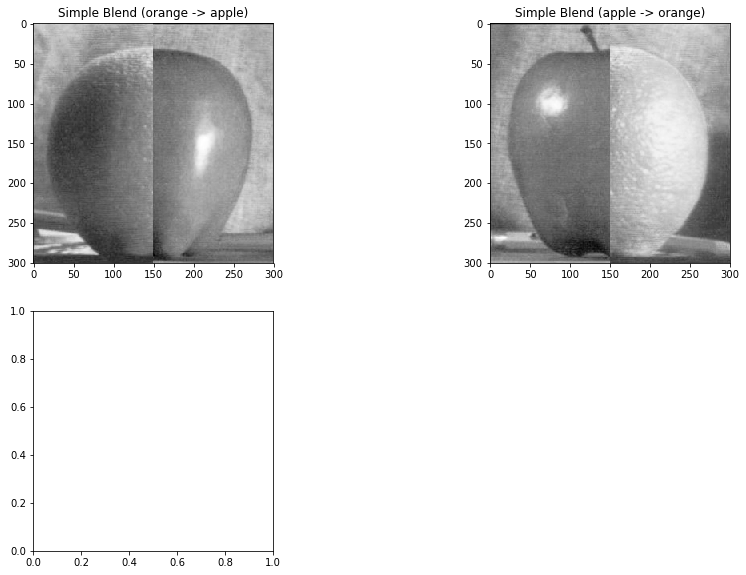

In [118]:
plt.figure(figsize=(15,15))

plt.subplot(3,2,1)
plt.imshow(simple_blend(orange, apple), cmap=cm.Greys_r)
plt.title("Simple Blend (orange -> apple)")
plt.subplot(3,2,2)
plt.imshow(simple_blend(apple, orange), cmap=cm.Greys_r)
plt.title("Simple Blend (apple -> orange)")

alpha = .5
plt.subplot(3,2,3)
plt.imshow(alpha_blend(orange, apple, alpha), cmap=cm.Greys_r)
plt.title("Alpha Blend (orange -> apple)")
plt.subplot(3,2,4)
plt.imshow(alpha_blend(apple, orange, alpha), cmap=cm.Greys_r)
plt.title("Alpha Blend (apple -> orange)")
